In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

## Definition of a test function

We define a function "func" with a known integral, which we cast as another function "func_integral".

In [3]:
def func(x=None):
    return(- 0.3 + x**2 + 0.05 * x**3 - 0.05 * x**4)

def func_integral(x=None):
    return(- 0.3 * x + x**3 / 3. + 0.05 * x**4 / 4. - 0.05 * x**5 / 5.)

In [4]:
num = 1000
x = 6. * (np.arange(num, dtype=np.float64) + 0.5) / np.float64(num)

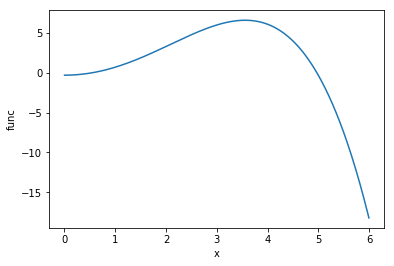

In [5]:
plt.plot(x, func(x))
plt.xlabel('x')
plt.ylabel('func')

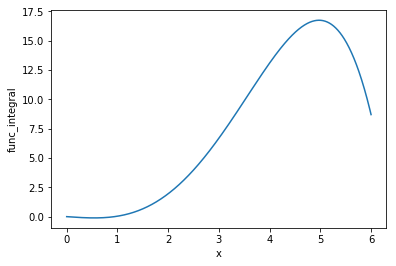

In [6]:
plt.plot(x, func_integral(x))
plt.xlabel('x')
plt.ylabel('func_integral')

## Trapezoid method for integration

We can use the trapezoid method to integrate the function. Basically, this is a weighted some of a bunch of different, equally spaced locations. It is equal to the integration of the linear interpolation of the function between the equally spaced points.

In [7]:
range = [0., 5.]
num = 1001
x = range[0] + (range[1] - range[0]) * (np.arange(num, dtype=np.float64)) / np.float64(num - 1.)
dx = (range[1] - range[0]) / np.float64(num - 1.)

In [8]:
traps_weights = np.ones(num, dtype=np.float64)
traps_weights[0] = traps_weights[0] * 0.5
traps_weights[-1] = traps_weights[-1] * 0.5

Except for the end-points, this is just equivalent to adding up the function in steps with spacing dx, weighted by dx.

In [9]:
print(traps_weights)

[ 0.5  1.   1.  ...,  1.   1.   0.5]


In [10]:
traps_integral = (func(x) * traps_weights * dx).sum()
print(traps_integral)
real_integral = func_integral(range[1]) - func_integral(range[0])
print(real_integral)
print(traps_integral - real_integral)
print((traps_integral - real_integral) / real_integral)

16.7291432292
16.729166666666664
-2.34374947929e-05
-1.40099595275e-06


## Simpsons method

If the trapezoid method is the integration of a linear interpolation, Simpson's method is the integration of a quadratic interpolation, where the interpolation done within pairs of intervals, or triplets of points.

In [11]:
num = 1001
x = range[0] + (range[1] - range[0]) * (np.arange(num, dtype=np.float64)) / np.float64(num - 1.)
dx = (range[1] - range[0]) / np.float64(num - 1.)
simps_weights = np.zeros(num, dtype=np.float64)
simps_weights[0] = 1. / 3.
simps_weights[-1] = 1. / 3.
simps_weights[1:-1:2] = np.zeros(num // 2, dtype=np.float64) + 4. / 3.
simps_weights[2:-1:2] = np.zeros(num // 2 - 1, dtype=np.float64) + 2. / 3.

In [12]:
print(simps_weights)

[ 0.33333333  1.33333333  0.66666667 ...,  0.66666667  1.33333333
  0.33333333]


In [13]:
simps_integral = (func(x) * simps_weights * dx).sum()
print(simps_integral)
real_integral = func_integral(range[1]) - func_integral(range[0])
print(real_integral)
print(simps_integral - real_integral)
print((simps_integral - real_integral) / real_integral)

16.7291666666
16.729166666666664
-2.08331130125e-11
-1.24531684259e-12


## Remapping integration limits

In order to deal with integrations to infinity, or for other reasons, it can be useful to remap integration limits. In this example, we integration $e^{-x}$ from 0 to $\infty$.

In [14]:
def func(x=None):
    return (np.exp(- x))

In [15]:
def func_rescale(xp=None, a=None):
    x = a * (1. + xp) / (1. - xp)
    weight = 2. * a / (1. - xp)**2
    return (weight * func(x=x))

In [16]:
num = 1001
range = np.array([-1., 1.], dtype=np.float64)
x = range[0] + (range[1] - range[0]) * (np.arange(num, dtype=np.float64)) / np.float64(num)
dx = (range[1] - range[0]) / np.float64(num)
simps_weights = np.zeros(num, dtype=np.float64)
simps_weights[0] = 1. / 3.
simps_weights[-1] = 1. / 3.
simps_weights[1:-1:2] = np.zeros(num // 2, dtype=np.float64) + 4. / 3.
simps_weights[2:-1:2] = np.zeros(num // 2 - 1, dtype=np.float64) + 2. / 3.

There is a parameter $a$ in the remapping that needs to be set. The integration is most accurate if $a$ is somewhere near where the integral reaches about half its total value.

In [17]:
a = 0.1
simps_integral = (func_rescale(x, a=a) * simps_weights * dx).sum()
print(simps_integral - 1.)

6.43449737936e-11


In [18]:
a = 1.
simps_integral = (func_rescale(x, a=a) * simps_weights * dx).sum()
print(simps_integral - 1.)

5.55111512313e-15


In [19]:
a = 10.
simps_integral = (func_rescale(x, a=a) * simps_weights * dx).sum()
print(simps_integral - 1.)

7.52531370551e-12


## Fixed-order Gaussian quadrature

With only $N$ points, Gaussian quadrature achieves a really high order of integration ($2N-1$). Here we explicitly perform 4th order Gaussian quadrature.

In [20]:
y1 = np.float64(0.339981043585)
y2 = np.float64(0.861136311594)
w1 = np.float64(0.652145154862)
w2 = np.float64(0.347854845137)
xp = np.array([- y2, - y1, y1, y2], dtype=np.float64)
gauss_weights = np.array([w2, w1, w1, w2], dtype=np.float64)

In [21]:
def func(x=None):
    return(- 0.3 + x**2 + 0.05 * x**3 - 0.05 * x**4)

def func_rescale(xp=None, range=None):
    weight = (range[1] - range[0]) * 0.5
    x = range[0] + 0.5 * (range[1] - range[0]) * (xp + 1.)
    return(weight * func(x=x))

def func_integral(x=None):
    return(- 0.3 * x + x**3 / 3. + 0.05 * x**4 / 4. - 0.05 * x**5 / 5.)

In [22]:
range = np.array([0., 5.], dtype=np.float64)
gauss_integral = (func_rescale(xp, range=range) * gauss_weights).sum()
real_integral = func_integral(x=range[1]) - func_integral(x=range[0])
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)

16.7291666667
16.7291666667
-1.53335122377e-11


It will work really well up to 7th order polynomials.

In [23]:
def func(x=None):
    return(- 0.3 + x**2 + 0.05 * x**3 - 0.05 * x**4 + 0.0017 * x**6 - 0.0004 * x**7)

def func_rescale(xp=None, range=None):
    weight = (range[1] - range[0]) * 0.5
    x = range[0] + 0.5 * (range[1] - range[0]) * (xp + 1.)
    return(weight * func(x=x))

def func_integral(x=None):
    return(- 0.3 * x + x**3 / 3. + 0.05 * x**4 / 4. - 0.05 * x**5 / 5. +
           0.0017 * x**7 / 7. - 0.0004 * x**8 / 8.)

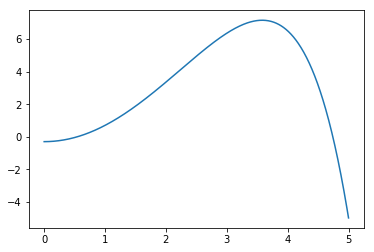

In [24]:
x = np.arange(1000) / np.float64(999) * (range[1] - range[0]) + range[0]
plt.plot(x, func(x))

In [25]:
gauss_integral = (func_rescale(xp, range=range) * gauss_weights).sum()
real_integral = func_integral(x=range[1]) - func_integral(x=range[0])
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)

16.1711309524
16.1711309524
-1.33404398639e-11


For 8th order polynomials and above, it will start to exhibit approximation errors.

In [26]:
def func(x=None):
    return(- 0.3 + x**2 + 0.05 * x**3 - 0.05 * x**4 + 0.0017 * x**6 - 0.0004 * x**7 + 0.00002 * x**8)

def func_rescale(xp=None, range=None):
    weight = (range[1] - range[0]) * 0.5
    x = range[0] + 0.5 * (range[1] - range[0]) * (xp + 1.)
    return(weight * func(x=x))

def func_integral(x=None):
    return(- 0.3 * x + x**3 / 3. + 0.05 * x**4 / 4. - 0.05 * x**5 / 5. +
           0.0017 * x**7 / 7. - 0.0004 * x**8 / 8. + 0.00002 * x**9 / 9.)

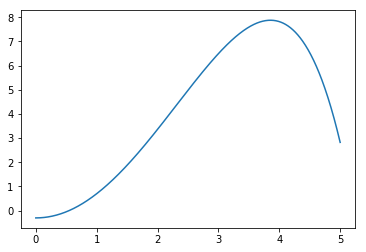

In [27]:
x = np.arange(1000) / np.float64(999) * (range[1] - range[0]) + range[0]
plt.plot(x, func(x))

In [28]:
gauss_integral = (func_rescale(xp, range=range) * gauss_weights).sum()
real_integral = func_integral(x=range[1]) - func_integral(x=range[0])
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)

20.5105229592
20.5114087302
-0.000885770994238


## SciPy Implementation

SciPy has a module for integration using these and other techniques. We can reproduce the above results, and also easily reach to higher order.

In [29]:
(gauss_integral, none) = integrate.fixed_quad(func, range[0], range[1], n=4)
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)

20.5105229592
20.5114087302
-0.000885770975056


In [30]:
(gauss_integral, none) = integrate.fixed_quad(func, range[0], range[1], n=5)
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)

20.5114087302
20.5114087302
0.0


Here we return to the exponential, which shows how to remap this to the range [-1, 1] and demonstrates performance of fixed_quad.

In [31]:
def func(x=None):
    return (np.exp(- x))

def func_rescale(xp=None, a=None):
    x = a * (1. + xp) / (1. - xp)
    weight = 2. * a / (1. - xp)**2
    return (weight * func(x=x))

In [32]:
range = np.array([-1., 1.], dtype=np.float64)
(gauss_integral, none) = integrate.fixed_quad(func_rescale, range[0], range[1], args=(np.float64(1.),), n=5)
print(gauss_integral)
print(gauss_integral - 1.)

1.00263507657
0.00263507656551


In [33]:
range = np.array([-1., 1.], dtype=np.float64)
(gauss_integral, none) = integrate.fixed_quad(func_rescale, range[0], range[1], args=(np.float64(1.),), n=20)
print(gauss_integral)
print(gauss_integral - 1.)

1.00000042719
4.27190940622e-07


But the method is quite bad if there is a singularity, as in $1/\sqrt{1-x^2}$.

In [72]:
def func_f(x=None):
    return (1.)

def func(x=None):
    return (func_f(x) * (1. / np.sqrt(1. - x**2)))

In [73]:
range = np.array([-1., 1.], dtype=np.float64)
(gauss_integral, none) = integrate.fixed_quad(func, range[0], range[1], n=5)
print(gauss_integral)
print(gauss_integral - np.pi)

2.82541007946
-0.316182574131


Gauss-Chebyshev polynomials are the right thing to use for it.

In [74]:
(x, weight) = np.polynomial.chebyshev.chebgauss(10)

In [76]:
gausscheb_integral = (func_f(x) * weight).sum()
print(gausscheb_integral)
print(gausscheb_integral - np.pi)

3.14159265359
0.0


## A physical example: nuclear reaction rates

In [59]:
def r12_f(x=None, eckT=None):
    return(1. * np.exp(- (eckT / x)**0.5))

In [71]:
from numpy.polynomial.laguerre import laggauss
(lg_x, lg_weights) = laggauss(20)
(lg_x_80, lg_weights_80) = laggauss(80)

In [72]:
print((r12_f(x=lg_x, eckT=0.1) * lg_weights).sum())

0.636497741162


In [73]:
neckT = 300
lneckT_range = np.log([0.01, 10000.])
lneckT = lneckT_range[0] + (lneckT_range[1] - lneckT_range[0]) * np.arange(neckT) / (np.float64(neckT) - 1.)
eckT = np.exp(lneckT)

In [74]:
r12 = np.zeros(neckT)
for indx in np.arange(neckT, dtype=np.int32):
    r12[indx] = (r12_f(lg_x, eckT=eckT[indx]) * lg_weights).sum()

In [75]:
r12_80 = np.zeros(neckT)
for indx in np.arange(neckT, dtype=np.int32):
    r12_80[indx] = (r12_f(lg_x_80, eckT=eckT[indx]) * lg_weights_80).sum()

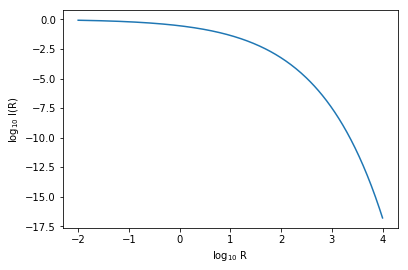

In [76]:
plt.plot(np.log10(eckT), np.log10(r12))
plt.xlabel('log$_{10}$ R')
plt.ylabel('log$_{10}$ I(R)')

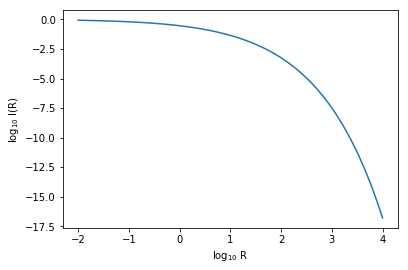

In [77]:
plt.plot(np.log10(eckT), np.log10(r12_80))
plt.xlabel('log$_{10}$ R')
plt.ylabel('log$_{10}$ I(R)')

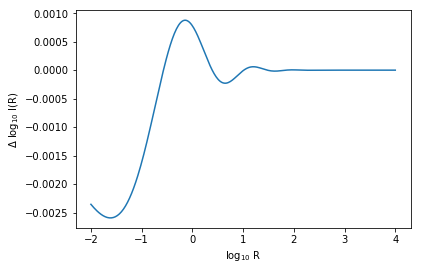

In [78]:
plt.plot(np.log10(eckT), np.log10(r12_80) - np.log10(r12))
plt.xlabel('log$_{10}$ R')
plt.ylabel('$\Delta$ log$_{10}$ I(R)')

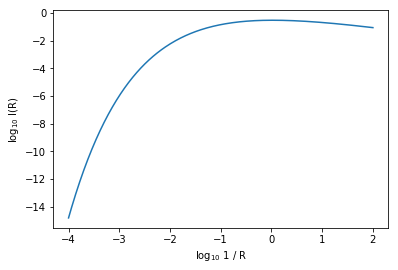

In [79]:
plt.plot(np.log10(1. / eckT), np.log10(r12 * np.sqrt(eckT)))
plt.xlabel('log$_{10}$ 1 / R')
plt.ylabel('log$_{10}$ I(R)')